<center>
    <h1 style="color:blue"> YSU MMF, Python, Spring 2021 </h1>
    <h2 style="color:blue"> Lecture 22 </h2>
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

## Pandas DataFrame

In [3]:
m = np.arange(20).reshape(4, -1)

In [4]:
df1 = pd.DataFrame(m, columns = list("abcde"))
df1

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [6]:
s1 = pd.Series([0, -1, 2, 0])
s1

0    0
1   -1
2    2
3    0
dtype: int64

In [8]:
df1["f"] = s1
df1

,a,b,c,d,e,f
0,0,1,2,3,4,0
1,5,6,7,8,9,-1
2,10,11,12,13,14,2
3,15,16,17,18,19,0


- Add a Row to a DataFrame

In [10]:
df1.loc[4] = [1, 2, 3, 4, 5, 6]
df1

,a,b,c,d,e,f
0,0,1,2,3,4,0
1,5,6,7,8,9,-1
2,10,11,12,13,14,2
3,15,16,17,18,19,0
4,1,2,3,4,5,6


 - Sort a Series and DataFrame by indices; by columns, by values

In [14]:
df1.index = [3, 4, 1, 5, 7]
df1

,a,b,c,d,e,f
3,0,1,2,3,4,0
4,5,6,7,8,9,-1
1,10,11,12,13,14,2
5,15,16,17,18,19,0
7,1,2,3,4,5,6


In [15]:
df1.sort_index(axis=1, ascending=False)

,f,e,d,c,b,a
3,0,4,3,2,1,0
4,-1,9,8,7,6,5
1,2,14,13,12,11,10
5,0,19,18,17,16,15
7,6,5,4,3,2,1


In [16]:
df1.sort_values(by = ["e", "f"])

,a,b,c,d,e,f
3,0,1,2,3,4,0
7,1,2,3,4,5,6
4,5,6,7,8,9,-1
1,10,11,12,13,14,2
5,15,16,17,18,19,0


In [17]:
df1.loc[4, "e"] = 5
df1

,a,b,c,d,e,f
3,0,1,2,3,4,0
4,5,6,7,8,5,-1
1,10,11,12,13,14,2
5,15,16,17,18,19,0
7,1,2,3,4,5,6


In [18]:
df1.sort_values(by = ["e", "f"], ascending=False)

,a,b,c,d,e,f
5,15,16,17,18,19,0
1,10,11,12,13,14,2
7,1,2,3,4,5,6
4,5,6,7,8,5,-1
3,0,1,2,3,4,0


In [19]:
df2 = df1.reindex(columns = ["f", "a", "d", "e", "c", "b", "g"])
df2

,f,a,d,e,c,b,g
3,0,0,3,4,2,1,NaN
4,-1,5,8,5,7,6,NaN
1,2,10,13,14,12,11,NaN
5,0,15,18,19,17,16,NaN
7,6,1,4,5,3,2,NaN


In [20]:
df2.sort_index(axis = 1)

,a,b,c,d,e,f,g
3,0,1,2,3,4,0,NaN
4,5,6,7,8,5,-1,NaN
1,10,11,12,13,14,2,NaN
5,15,16,17,18,19,0,NaN
7,1,2,3,4,5,6,NaN


- Describe the DataFrame

In [21]:
df2.describe()

,f,a,d,e,c,b,g
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0
mean,1.400000,6.200000,9.200000,9.400000,8.200000,7.200000,NaN
std,2.792848,6.300794,6.300794,6.730527,6.300794,6.300794,NaN
min,-1.000000,0.000000,3.000000,4.000000,2.000000,1.000000,NaN
25%,0.000000,1.000000,4.000000,5.000000,3.000000,2.000000,NaN
50%,0.000000,5.000000,8.000000,5.000000,7.000000,6.000000,NaN
75%,2.000000,10.000000,13.000000,14.000000,12.000000,11.000000,NaN
max,6.000000,15.000000,18.000000,19.000000,17.000000,16.000000,NaN


- Take a particulat element by `iloc` or by `iat`

In [22]:
df2.loc[1, "g"] = 3
df2.loc[4, "g"] = 2

In [25]:
df2

,f,a,d,e,c,b,g
3,0,0,3,4,2,1,NaN
4,-1,5,8,5,7,6,2.0
1,2,10,13,14,12,11,3.0
5,0,15,18,19,17,16,NaN
7,6,1,4,5,3,2,NaN


In [26]:
df2.iloc[2, 2]

13

In [27]:
df2.iat[2, 2]

13

- Drop the rows with missing values

In [29]:
df3 = df2.dropna()

In [30]:
df3

,f,a,d,e,c,b,g
4,-1,5,8,5,7,6,2.0
1,2,10,13,14,12,11,3.0


In [31]:
df2[df2["g"] % 1 == 0]

,f,a,d,e,c,b,g
4,-1,5,8,5,7,6,2.0
1,2,10,13,14,12,11,3.0


- Fill Missing Values

In [32]:
df2.fillna(method="ffill")

,f,a,d,e,c,b,g
3,0,0,3,4,2,1,NaN
4,-1,5,8,5,7,6,2.0
1,2,10,13,14,12,11,3.0
5,0,15,18,19,17,16,3.0
7,6,1,4,5,3,2,3.0


In [33]:
df2

,f,a,d,e,c,b,g
3,0,0,3,4,2,1,NaN
4,-1,5,8,5,7,6,2.0
1,2,10,13,14,12,11,3.0
5,0,15,18,19,17,16,NaN
7,6,1,4,5,3,2,NaN


- Calculate the mean by columns/rows

In [34]:
df2.median(axis = 1)

3     1.5
4     5.0
1    11.0
5    16.5
7     3.5
dtype: float64

In [35]:
df2.mad()

f    2.08
a    5.04
d    5.04
e    5.68
c    5.04
b    5.04
g    0.50
dtype: float64

In [36]:
df2.std()

f    2.792848
a    6.300794
d    6.300794
e    6.730527
c    6.300794
b    6.300794
g    0.707107
dtype: float64

In [37]:
df2.idxmax()

f    7
a    5
d    5
e    5
c    5
b    5
g    1
dtype: int64

In [38]:
df2.cumsum()

,f,a,d,e,c,b,g
3,0,0,3,4,2,1,NaN
4,-1,5,11,9,9,7,2.0
1,1,15,24,23,21,18,5.0
5,1,30,42,42,38,34,NaN
7,7,31,46,47,41,36,NaN


- Apply a function to DataFrame

In [40]:
df2

,f,a,d,e,c,b,g
3,0,0,3,4,2,1,NaN
4,-1,5,8,5,7,6,2.0
1,2,10,13,14,12,11,3.0
5,0,15,18,19,17,16,NaN
7,6,1,4,5,3,2,NaN


In [39]:
df2.apply(lambda x: x**2)

,f,a,d,e,c,b,g
3,0,0,9,16,4,1,NaN
4,1,25,64,25,49,36,4.0
1,4,100,169,196,144,121,9.0
5,0,225,324,361,289,256,NaN
7,36,1,16,25,9,4,NaN


- Plot the Data on each column

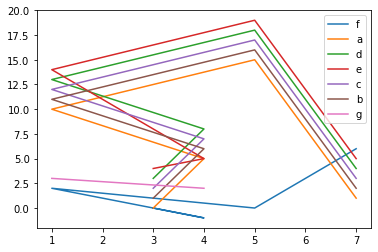

In [41]:
df2.plot();

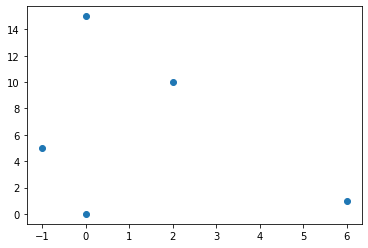

In [42]:
plt.scatter(df2["f"], df2["a"]);

In [43]:
df3 = pd.DataFrame(np.random.randn(10, 2))
df3

,0,1
0,-0.145978,2.717714
1,0.305163,1.205925
2,0.628839,1.055324
3,0.877223,-1.291692
4,-0.937613,0.394591
5,-0.310784,-0.904646
6,-0.093154,0.014603
7,-0.677625,-0.518014
8,0.679220,0.045135
9,-0.866974,-0.731098


In [44]:
df3.head(5)

,0,1
0,-0.145978,2.717714
1,0.305163,1.205925
2,0.628839,1.055324
3,0.877223,-1.291692
4,-0.937613,0.394591


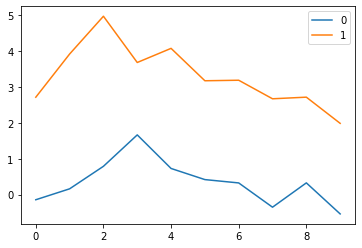

In [45]:
df3.cumsum().plot();

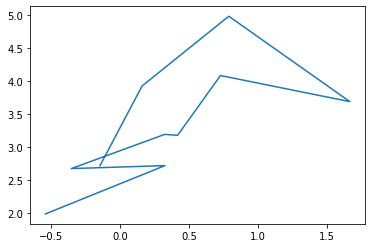

In [46]:
df4 = df3.cumsum()
plt.plot(df4[0], df4[1]);